In [8]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input,train_target),(test_input,test_target)=keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1,28,28,1)/255.0
train_scaled,val_scaled,train_target,val_target=train_test_split(train_scaled,train_target,test_size=0.2,random_state=42)

In [9]:
model=keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=3,activation='relu',padding='same',input_shape=(28,28,1)))

In [10]:
model.add(keras.layers.MaxPooling2D(2))

In [11]:
model.add(keras.layers.Conv2D(64,kernel_size=3,activation='relu',padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [12]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10,activation='softmax'))

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               313700    
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)              

In [16]:
keras.utils.plot_model(model)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [18]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb=keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)
history=model.fit(train_scaled,train_target,epochs=20,validation_data=(val_scaled,val_target),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 23s 15ms/step - loss: 0.5246 - accuracy: 0.8111 - val_loss: 0.3308 - val_accuracy: 0.8789
Epoch 2/20
1500/1500 [==============================] - 24s 16ms/step - loss: 0.3513 - accuracy: 0.8763 - val_loss: 0.2814 - val_accuracy: 0.8951
Epoch 3/20
1500/1500 [==============================] - 21s 14ms/step - loss: 0.3010 - accuracy: 0.8905 - val_loss: 0.2578 - val_accuracy: 0.9048
Epoch 4/20
1500/1500 [==============================] - 21s 14ms/step - loss: 0.2680 - accuracy: 0.9024 - val_loss: 0.2407 - val_accuracy: 0.9107
Epoch 5/20
1500/1500 [==============================] - 22s 14ms/step - loss: 0.2460 - accuracy: 0.9088 - val_loss: 0.2382 - val_accuracy: 0.9107
Epoch 6/20
1500/1500 [==============================] - 22s 14ms/step - loss: 0.2215 - accuracy: 0.9173 - val_loss: 0.2256 - val_accuracy: 0.9147
Epoch 7/20
1500/1500 [==============================] - 22s 14ms/step - loss: 0.2066 - accuracy: 0.9231 - val_loss: 0.2247 -

In [22]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

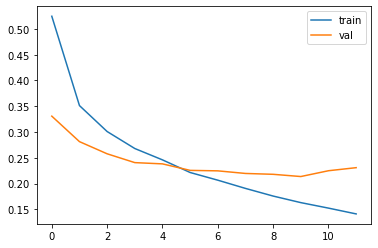

In [23]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','val'])
plt.show()

In [24]:
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 2s 4ms/step - loss: 0.2137 - accuracy: 0.9226


[0.21368521451950073, 0.9225833415985107]

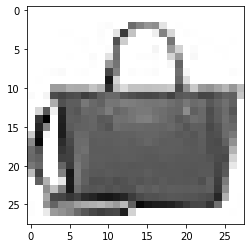

In [25]:
plt.imshow(val_scaled[0].reshape(28,28),cmap='gray_r')
plt.show()

In [41]:
import numpy as np
preds=model.predict(val_scaled[0:1])
print(preds[0,:])
print(np.round_(preds[0,:]))

[8.5388586e-21 1.5776593e-26 9.6975295e-27 2.5249197e-21 3.6049639e-20
 4.7392730e-18 5.6775651e-23 1.7420984e-18 1.0000000e+00 1.0904330e-22]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


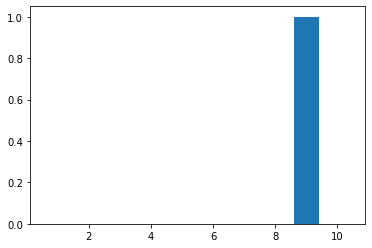

In [42]:
plt.bar(range(1,11),preds[0])
plt.show()

In [43]:
classes=['티셔츠','바지','스웨터','드레스','코트','샌달','셔츠','스니커즈','가방','앵클 부츠']

In [44]:
print(classes[np.argmax(preds)])

가방


In [46]:
test_scaled=test_input.reshape(-1,28,28,1)/255.0

In [47]:
model.evaluate(test_scaled,test_target)

313/313 [==============================] - 1s 4ms/step - loss: 0.2425 - accuracy: 0.9181


[0.24245363473892212, 0.9180999994277954]